# Empalme con la clase anterior (8): Clasificacion multiclase $K>2$.
Que pasa si en vez de dos objetos (perros y gatos) tenemos 3 o mas?
Vamos a estudiar varios metodos.

1. Generalizar la sigmoid $S(t)=\sigma(t)$ a mas des dos clase. La nueva funci'on multiclase se llama **softmax function**.
2. Uno contra todos (el resto).
3. Vamos a hablar de el **one hot encoded**.
Por ejemplo, perros, gatos, conejos

\begin{eqnarray}
\text{perros} = \begin{pmatrix} 1 \\ 0 \\ 0  
\end{pmatrix}  \quad , \quad
\text{gatos} = \begin{pmatrix} 0 \\ 1 \\ 0  
\end{pmatrix}  \quad , \quad
\text{conejos} = \begin{pmatrix} 0 \\ 0 \\ 1  
\end{pmatrix}  
\end{eqnarray}

# Multiclase $K > 2$
Hasta el momento solo hemos analizado dos clases: e.g. " perros y gatos". EL ML debe soportar cualquier numero de clases. Por ejemplo el AlexNet gano el premio en el ImageNet en 2012 donde el conjunto de datos era un millon doscientosmil imagenes con 1000 clases.

Generamizamos la funcion logistica.


\begin{eqnarray}
\sigma : \mathbb{R}^K & \to [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_i)}
\end{eqnarray}

De tarea se deja que se pruebe que si $K=2$, $\sigma$ se reduce a la logistic sigmoid.

Este funci'on tiene propidades interesantes:

* Se comporta como probabilidad. Todas sus componentes son positivas y su suma es 1.

* Es de alto contraste. La exponencial tiene a exagerar valores.

* Suave. Infinitamente diferenciable. Bueno para metodos de gradiente.

* Es consistente con la cross-entropy (de la clase anterior).

Podemos definir la hipotesis como

$$h(\theta, x) = \begin{pmatrix}
P(y=1 | x; \theta ) \\
P(y=2 | x; \theta ) \\
\vdots \\
P(y=K | x; \theta ) \\
\end{pmatrix} = \begin{pmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\vdots
\sigma(z_K) \\
\end{pmatrix}
= \frac{1}{\sum_{j=1}^K \exp(z_j)}
\begin{pmatrix}
\exp(z_1) \\
\exp(z_2) \\
\vdots \\
\exp(z_K) \\
\end{pmatrix}
$$

Donde

$$z_i = (\theta^{(i)})^T x $$

Dejamos como tarea construir la funcion de costo. Ayuda los pasos son:

1. Escribir la funcion de probabilidad multivariable para cada muestra.
2. Encontrar la verosimilitud. Es un productoria doble sobre muestras y clases.
Ojo, usar la funcion indicadora que se muestra a continuacion.
3. Tomar el logaritmo de la verosimilitud. Se convierte la doble productoria en una doble suma.
4. Cambie el signo para convertirla de concava a convexa.

Se debe obtener, la funcion de costo.

$$J(\theta) =
\left [
\sum_{i=1}^m \sum_{k=1}^K \mathbb{1} [ y^{(i)}=k ]
\log  \frac{\exp(z_k)}{\sum_{j=1}^K \exp(z_j)}
    \right ] $$

Donde la funcion indicadora $\mathbb{1}(x)$ se define como


\begin{eqnarray}
\mathbb{1}(x)
\begin{cases}
1  \quad , \quad \text{si} x  \quad \text{es verdad} \\
0  \quad , \quad \text{si} x  \quad \text{es falso} \\
\end{cases}
\end{eqnarray}


Recuerden los pasos en ML

1. Encontrar funcion de costo
2. Encontrar gradiente de la funcion de costo
3. Entrenar el sistema (minimizacion con gradiente)
4. Probar los resultados


El gradiente de la funcion de costo est'a dado por

$$\nabla_\theta J(\theta) = - \sum_{i=1}^m \left [ x^{(i)} \left (  \mathbb{1}[y^{(i)} = k ]  - p( y^{(i)} = k | x^{(i)}; \theta)  \right )  \right ]  $$

Se usa comunmente **one hot encoding vectors**.

\begin{eqnarray}
\text{perros} = \begin{pmatrix} 1 \\ 0 \\ 0  
\end{pmatrix}  \quad , \quad
\text{gatos} = \begin{pmatrix} 0 \\ 1 \\ 0  
\end{pmatrix}  \quad , \quad
\text{conejos} = \begin{pmatrix} 0 \\ 0 \\ 1  
\end{pmatrix}  
\end{eqnarray}

Toca revisar la dimensionalidad.

$$ Z = X \Theta  \quad  , \quad X \in \mathbb{R}^{m \times n} \quad , \quad \Theta \in \mathbb{R}^{n \times 3}  \quad , \quad Z \in \mathbb{R}^{m \times 3} $$

## Uno contra todos.
Realmente no es uno contra todos. Es uno contra los demas.
La idea es usar lo que ya sabemos del ML binario.

1. Tenemos $K$ clases.
2. Escogemos una $i$, separamos las demas $\text{demas} = 1,2, \cdots, i-1, i+1, \cdots ,K$
en un grupo.
3. Hacemos el analsisi con dos clases $i$ contra las $\text{demas}$.
Esto nos produce una hip'oteis $h_i(\theta , x)$.
4. Al final tenemos $K$ hip'otesis. Construimos una hipotesis global
Dada una muestra $x$

$$h(\theta,x) = \max_{i=1}^K h_i(\theta, x) $$

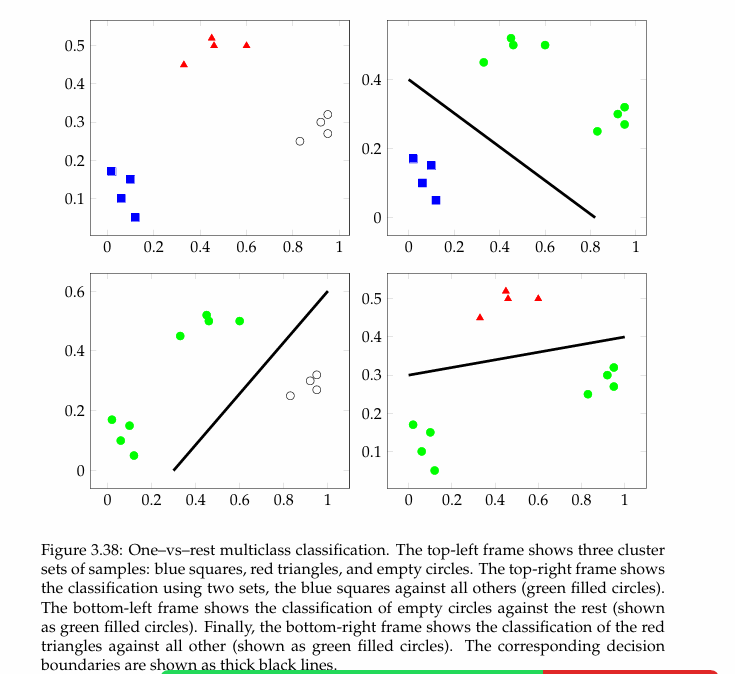

# Analisis de exactitud.

Mi traduccion
accuracy= exactitud
precision=precision

La pregunta es que tan bueno es el algorimo de clasificacion. Desarrolloamos herramientas para control de calidad (veririficar precision).

## Matriz de confusion.
Veamos un ejemplo. Se hacen pruebas dembarzo en 1494 mujeres y existen posibilidades.
1. Que la prueba sea positiva (o negativa)
2. Que la mujer este en embarazo ( o no)
$2 \times 2=4$. Hay cuatro posibilidades.

Veamos la Figura 3.41.



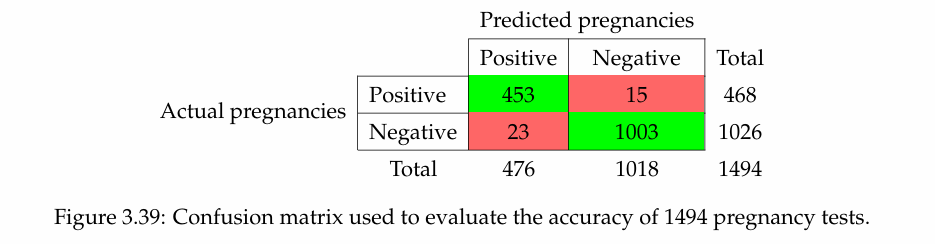

En la Figura 3.39 estan las cuatro posibilidades.
En la horizontal (filas) esta lo **real** (lo que ocurre).
En vertical (columnas) lo que la prueba arroja.

Cuando es positiva y se diagnostica como tal es $TP$ (True positive)
Cuando es positiva y se diagnostica como negativa tal es $FN$ (True positive)
Cuando es negativa y se diagnostica como positiva tal es $FP$ (True positive)
Cuando es negativa y se diagnostica como negativa tal es $TN$ (True positive)

El dibujo queda





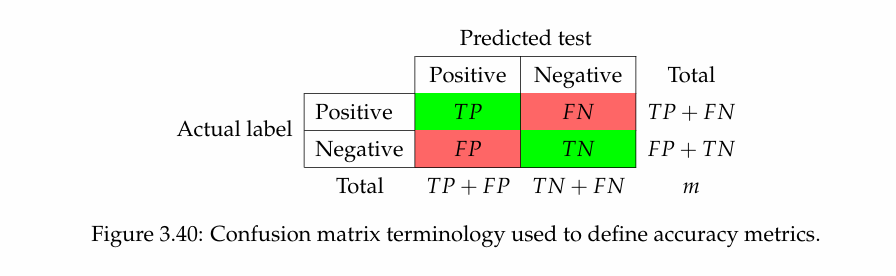

A la matriz 3.40 se le llama **matriz de confusion**.
El [blog de StackExchange](https://stats.stackexchange.com/questions/164910/what-is-the-origin-of-the-term-confusion-matrix) discute el origen de este t'ermino.

### Metricas sobre la matriz de confusion
La primera medida (metrica) que discutimos es " accuracy" (exactitud)

$$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{TP + TN}{m} $$
La suma de la diagonal (traza) sobre el total.

Vamos a ver que esta medida no es necesariamente la mejor.
De otro lado existe el " missclassification rate" que es lo contrario,
la suma de la antidiagonal (rojos) sobre todos

$$\text{missclasiffication rate} = \frac{FP + FN}{m} $$

Vamos a un ejemplo en `python` para calcular las componentes de la matriz confusion, dados unos datos juguete.


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0 ]
y_pred = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

# consultar el manual sobre el orden en que se devuelven los valores
tn, fp, fn, tp  =  confusion_matrix(y_true, y_pred).ravel()

# print results
print("tn: ", tn)
print("fp: ", fp)
print("fn: ", fn)
print("tp: ", tp)
#

tn:  3
fp:  3
fn:  2
tp:  4


Por que el "accuracy" no es suficiente para estimar el perfomance del algoritmo

**Ejemplo 3.3.2**: Un instituto de investigacion esta corriendo un programa con ML para analizar pacientes con diabetes. Usan $+$ si el paciente se diangostica con diabetes y $-$ si esta sano.  Analicemos las componentes de la matriz de confusion en este caso.

* True Positive (TP): La predicci'on es que el paciente **tiene diabetes** y la prediccion es cierta. Esto no es bueno para el paciente pero es bueno para la credibilidad del laboratorio.

* True Negative (TN): La predicci'on es que el paciente **no tiene diabetes** y es cierto. Es la mejor noticia para el paciente.

* Falso Positive (FP): Se predice que el paciente tiene tiene diabetes pero es falso. El paciente incurre en gastos de tratamiento y evitar comidas ricas, entre otras. Fallo el laboratorio pero no es el peor de los escenarios.

* Falso Negativo (FN): Este es el peor escenario. Por que el paciente es diganosticado sano pero esta enfermo. Va y como dulce y se pone peor.
Nota: Que tal si en vez de diabetes es cancer?

En este ejemplo el FN es el peor de los escenarios.

**Ejemplo 3.3.3**: (spam email). Asumimos un algoritmo en ML para detectar Spam email.

* True postive (TP): El email es spam y asi lo detecto el algoritmo. Muy bien.
el email se manda al spam box (junk box)

* True negative (TN): El email se predijo como bueno y es cierto. (no se borra)

* Falso Positivo (FP): El email se diagnostica como spam pero es bueno. Entonces se va a la basura y que consecuencias puede tener? Usted puede perder el trabajo. Consejo de Tatiana: revise el spam todos los dias.

* Falso Negativo (FN): Es basuara y piensa que es bueno. El sistema lo deja pasar, no lo borra. Lo podemos borrar manualmente. O marcarlo como spam para que sistema se entrene mejor.

Es interesante que en el caso de enfermedad los FN son lo peor pero
en spam eail el peor es el FP.

Los bancos tambien tienen el FP como el peor.

**Ejemplo 3.3.4**: (sicologico)
A usted le llega un mensaje de que se gano 1000 millones de pesos y que para poderlos pasar a su cuenta debe dar detalles de se cuenta.


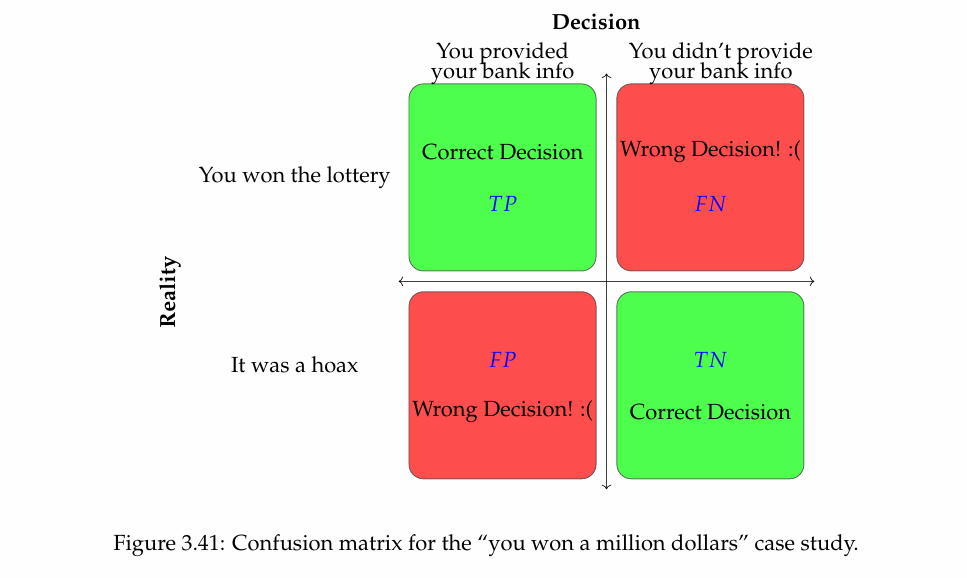

Es claro que en algunas ocaciones los FP son mejores que los FN o vice-versa.

Veamos mas motivaciones para engrandecer el numero de metricas en clasificacion (basadasa en la matriz de confusion).

Asumimos un ejemplo de spam email en la Figura 3.44.

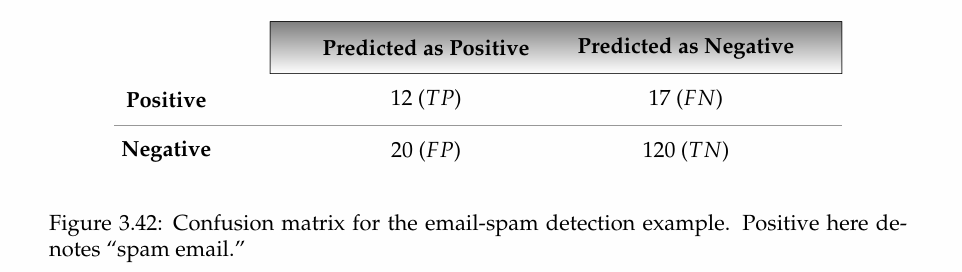

Evaluamos el accuracy

$$\text{accuracy} = \frac{12 + 120}{12 + 120 + 17+ 20}= 0.781 \quad 78\% $$

Vamos a asumir que el spam email clasifica **todos** los emails como buenos.
Veamos la tabla 3.45

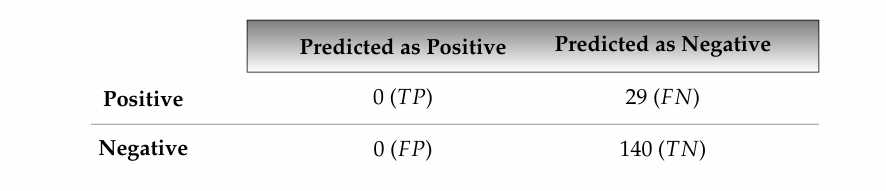

Calculemos el " accurracy"

$$\text{accuracy} = \frac{140}{169} = 0.828 \quad 82\% $$

Lo anterior nos motiva a introducir muevas metricas.

* Precision: Es el cociente en entre los TP (true positives) y los predichos como positivos TP+FP.

$$\text{precision} = \frac{TP}{TP + FP} $$
Volamos al ejemplo de la Figura 3.42.

$$\text{precision} = \frac{12}{12+20}= \frac{12}{32}= 0.375  \quad 37 \% $$

Veamos precision en el ejemplo del servidor de email que todo lo predice bueno.

$$\text{precision} = \frac{0}{0 + \epsilon} = 0. $$

* **Recall**: Tambien se llama **true positive rate** o **sensitivity**.
Es el cociente de TP (positivos verdaderos) sobre el total de positivos.

$$\text{recall} = \frac{TP}{TP + FN} $$

En el ejemplo de la figura 3.42

$$\text{recall} = \frac{12}{12 + 17} = \frac{12}{29} = 0.414 \quad , 41 \% $$

Entre **precision** y **recall** la diferencia esta en el segundo termino del denominador. Recuerden que estos dos $FN, FP$, se contraponen. Que en diagnosticos medicos $FN$ es lo peor y en la banca $FP$ es lo peor.
De alguna forma tener muchos de $FN$ es tener pocos de $FP$ y vice-versa.
La idea es escoger la metrica que mas convenga. Por ejemplo en la banca. Se usa precision (FP en denonominador) , mientras que en el diagnostico de enfermedades yo no quiero $FN$, estos se usan en recall para arrastralo hacia abajo. Quereos ser conservadores. Buscar metricas que arrastren valores hacia abajo.
Asi como existe lel TPR (True positive rate= recall) tambien existe el FPR (False postive rate)

* **FPR**:
$$ FPR = \frac{FP}{FP + TN}$$
Es la proporcion entre los FP y las muetras negativas.

Cuando los numeros $FP \approx FN$, cualquiera de las dos (precision y recall) esta bien.  Si son muy distintos, toca escoger uno sobre el otro.


 Cuando $FP=FN=0$ todas las metricas dan 1 (el 100 \%).

 Cuando precision y recall son muy distintos, existe otra metrica que se llama

 * **F1 score**:
 Este es un promedio entre las dos.  Que promedio? promedio arm'onico?
 por que armonico? por que es la menor de las medias pitagoricas (explico esto en un minuto).

 $$\text{F1 score} = \left (\frac{ \frac{1}{\text{precision}} + \frac{1}{\text{recall}}  }{2}  \right )^{-1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$

Las 'ultimas medidas importantes son ROC/AUC

* **ROC: Receiver Characeristic Operator**: Fue inventada en la segunda guerra mundial para estimar la precision en radares. La idea es tener un **continuo** de matrices de confusion, sobre el cual se pueda estimar la precision del algoritmo. Para crear ese continuo se usa el parametro **umbral** $\gamma$.

Se define una **curva parametrica** de $TPR$ vs $FPR$ donde el parametro es el umbral.

Explicamos como construir esta curva y como interpretarla.




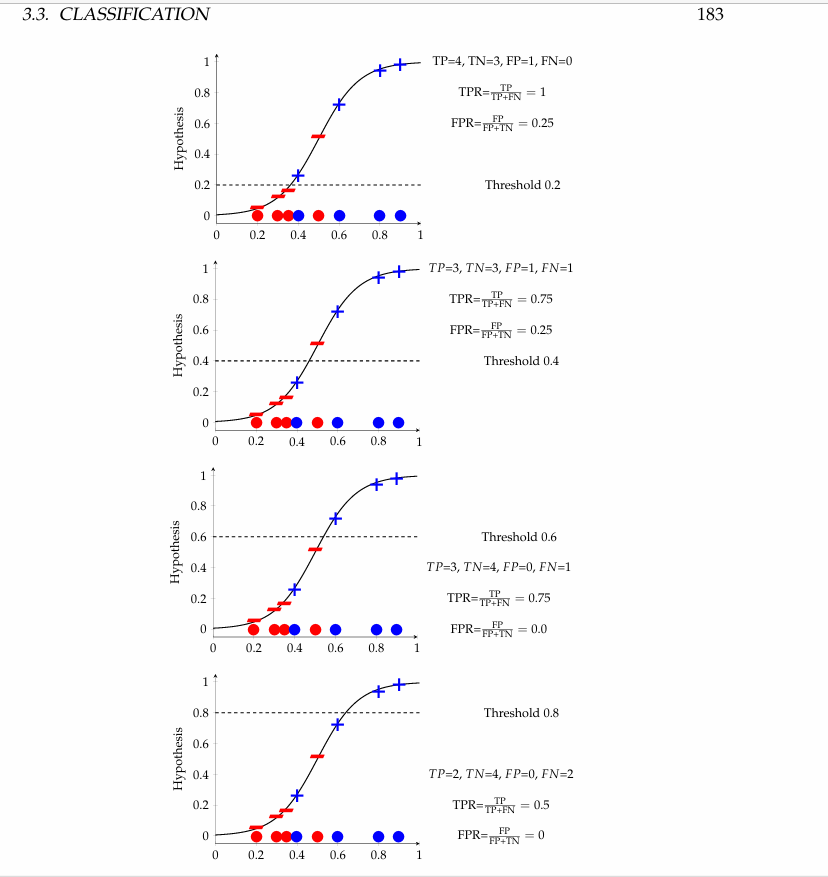

Se explico la figura de forma oral.
Veamos dos casos extremos

* Asumamos un umbral $\gamma=0$.  $TP=4$. $FP=$, $TN=0$, $FN=0$

$$TPR = \frac{TP}{TP + FN} = 1  $$
$$FPR = \frac{TP}{TP + TN} = 1  $$

El otro extremo es
$$\gamma=1$ $$
$TP=0$. $FP= 0$, $TN=4$, $FN=4$

$$TPR = \frac{0}{TP + FN} = 0  $$
$$FPR = \frac{0}{TP + TN} = 0  $$

Ahora reunimos todos los puntos calculados.
El eje $x$ es FPR y el eje y es $TPR$.

$$(0,0) ,  (0.25,1), (0.25, 0.75), (0, 0.75), ( 0, 0.5), (1,1) $$

Se grafican estos puntos.
Ver Figura 3.49.



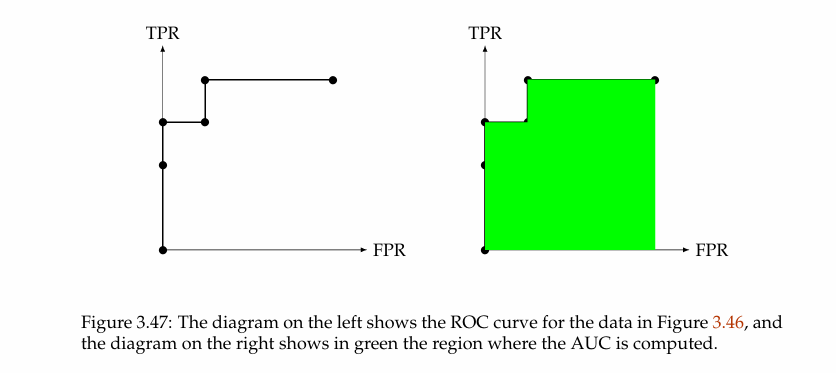

**Interpretacion**: La diagonal ocurre cuando FPR=TPR. La idea es que los puntos esten encima de la diagonal, donde predomina TPR.

* **AUC**: Area Under the Curve. Es el area bajo el ROC.

El area del poligno verde eso

$$AUC = 1 - (0.25)^2 = 0.9375 $$
Si esta area esta cerca de 1 es bueno.

Ejemplo en Python

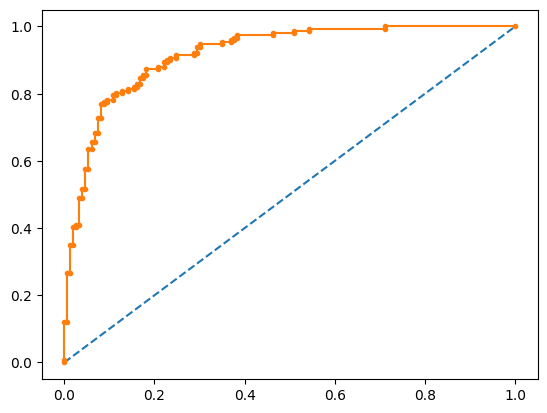

In [ ]:
# graficar una ROC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# create a simple data set
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split (separar) en training y testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# entrenar el modelo (train) using logistic regression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# predict probabilities
yhat = model.predict_proba(X_test)

# calcute the ROC curve
fpr, tpr, thresh = roc_curve(y_test, yhat[:,1], pos_label=1)

# plot the ROC curve
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
#


#

In [ ]:
# give me the AUC
auc = roc_auc_score(y_test, yhat[:,1])
print('AUC: %.3f' % auc)



AUC: 0.919


Por que el F1-Score usa la media harmonica.

# Medias Pitagoricas.
Sean dos cantidades positivas ( o cero) $a,b$

*  **Media aritmetica**
$$A = \frac{a+b}{2}  $$

* **Media Geometrica**
$$G = \sqrt{ab} $$

* **Root Mean Square( RMS)**: raiz cuadrada de la media de los cuadrados
$$Q = \sqrt{ \frac{a^2 + b^2}{2}} $$


* **Media Armonica**.

$$H = \frac{1}{  \frac{\frac1a + \frac1b}{2}} = 2 \frac{ab}{a+b} $$

Tarea:
* Si $a \ne b$ , $a > 0, b >0$
$$H < G < A < Q $$

* Si $a =b$
$$H=G=A = Q $$

* Si uno de los dos es 0. Por ejemplo $b=0$
$A=a/2$, $Q=\sqrt{2a}$, $G=0$, $H=0$.

* Si a=0=b$, no es gracia y hay algunas que no estan definidas.

Usar la siguiente grafica para enlazar la geometrica con el algebra.

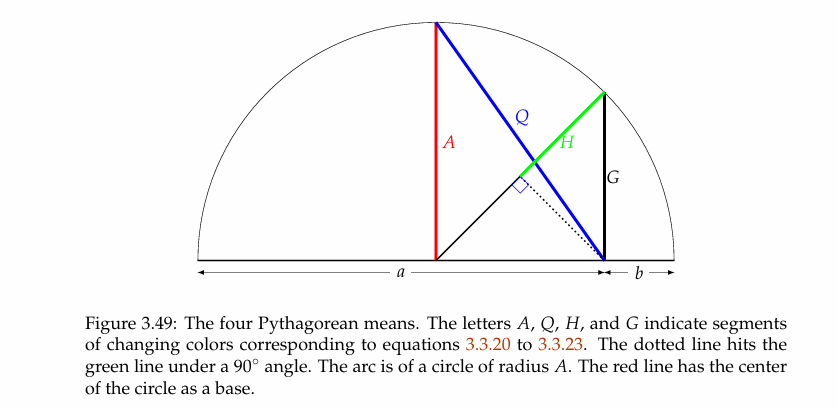

# Matriz de confusion para $K > 2$.
De la Figura 3.52.

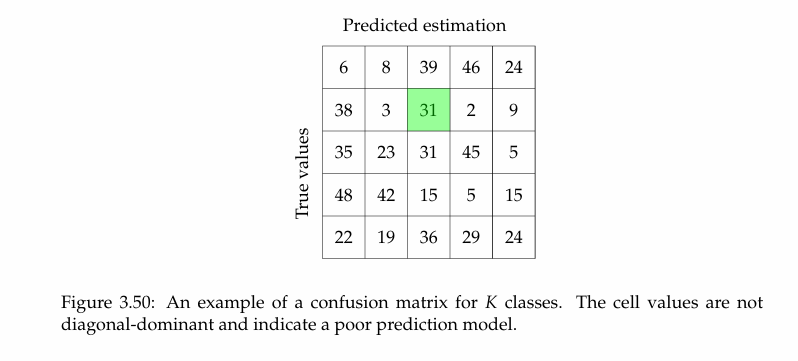

De entrada podemos definir accuracy como la traza de la matriz sobre $m$.

Caules son falsos positivos, negativos, etc.?

Veamos el caso de la primera fila/columna.

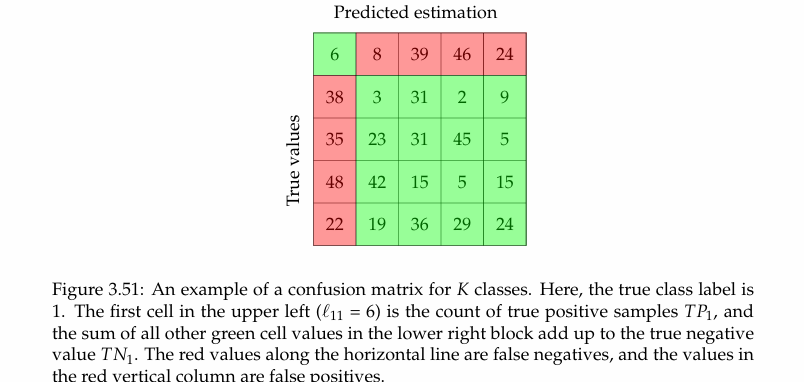

Veamos

* 6 de la entrada 11, es TP
* 8,39,46,24 de la primera fila. Se predicen negativos pero son positivos. Son FN.
* Los valores 38, 35, 48, 22 de la primera columna se predicen posivos y son negativos. son FN.

Cuantos son los TN?
Por complemento

TN = m - TP-FP-FN
Los verdes de la parte derecha inferior.

En general, ver Figura 3.54.

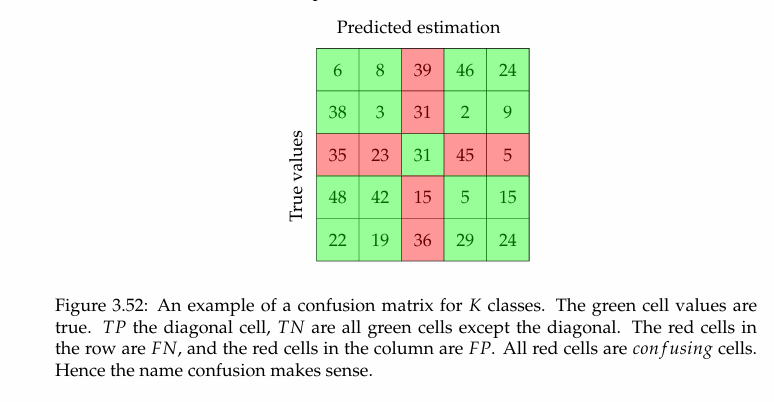

Las formulas son

\begin{eqnarray}
TP_i &=& \ell_{ii} \\
FP_i &=& \sum_{l=1}^K \ell_{li} - TP_i \\
FN_i &=& \sum_{l=1}^K \ell_{il} - TP_i \\
TN_i = m - TP_i - FP_i - FN_i
\end{eqnarray}
recuerden que

$$ m = \sum_{l=1}^K \sum_{j=1}^k \ell_{ij}$$
